      marks1    marks2
0  -0.900681  1.019004
1  -1.143017 -0.131979
2  -1.385353  0.328414
3  -1.506521  0.098217
4  -1.021849  1.249201
..       ...       ...
95 -0.173674 -0.131979
96 -0.173674 -0.362176
97  0.432165 -0.362176
98 -0.900681 -1.282963
99 -0.173674 -0.592373

[100 rows x 2 columns]
0.9947692885373453
0.7861374370998236
0.6236144236570511
0.9946508480470956
0.9712298553740961
0.6416516333974466
0.9269723155339973
0.992372116386328
0.9765525308543408
0.9572843040224919
Accuracy: 0.9111111111111111


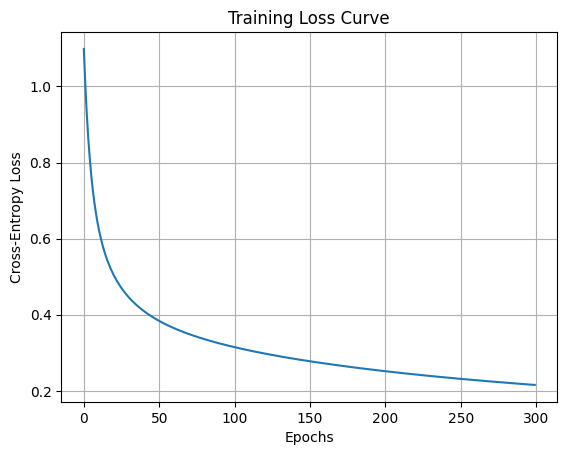

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset
X, y = load_iris(return_X_y=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Show first 100 rows of two features with renamed columns
X_df = pd.DataFrame(X_scaled[:, :2], columns=["marks1", "marks2"])
print(X_df.head(100))  # Output similar to your example

# One-hot encode the output classes
y_oh = np.eye(3)[y]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_oh, test_size=0.3, random_state=1)

# Define softmax and cross-entropy loss
def softmax(z): return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
def cross_entropy(y, p): return -np.mean(np.sum(y * np.log(p + 1e-8), axis=1))

# Initialize weights and biases
W = np.zeros((X.shape[1], 3))
b = np.zeros((1, 3))
losses = []

# Gradient descent
for _ in range(300):
    z = X_train @ W + b
    probs = softmax(z)
    losses.append(cross_entropy(y_train, probs))
    grad = probs - y_train
    W -= 0.1 * (X_train.T @ grad) / len(X_train)
    b -= 0.1 * np.sum(grad, axis=0, keepdims=True) / len(X_train)

# Prediction
probs_test = softmax(X_test @ W + b)

# Print first 10 predicted probabilities (max value from each softmax output)
for p in probs_test[:10]:
    print(p.max())  # To match your earlier sigmoid-like output values

# Get final predicted and true classes
preds = np.argmax(probs_test, axis=1)
true = np.argmax(y_test, axis=1)

# Accuracy
print("Accuracy:", accuracy_score(true, preds))

# Plot training loss
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.grid(True)
plt.show()
